# Chapter 4: 
# Cải thiện khả năng dự báo của mô hình bằng Feature Engineering

Như đã đề cập trong chương 1, Feature Engineering (FE) được hiểu như là việc biến đổi - chuyển hóa dữ liệu nguyên bản (Original Feature) thành Feature mới sao cho khả năng dự báo và phân loại của mô hình ML tăng lên. FE có thể là kĩ thuật đơn giản chuyển hóa biến định tính (Categorical) về biến Binary 0 - 1 vì rằng hầu hết các mô hình ML được xây dựng trong Python không chấp nhận Feature là biến định tính. FE không chỉ là biến đổi - chuyển hóa các features ban đầu thành các features mới mà còn có thể là việc tìm ra một feature mới (bằng một sự kết hợp - biến đổi nào đó từ các features đã có) hoặc loại bỏ các biến số nhiễu (noise) để nâng cao khả năng phân loại - dựa báo của mô hình. 

Chương này hướng vào các nội dung sau: 

- Giới thiệu về FE cho các mô hình ML. Để minh họa thì kĩ thuật chuẩn hóa 0 - 1 được sử dụng với mô hình KNN. 
- Tinh chỉnh tham số kết hợp với FE và Pipelines. 
- So sánh chất lượng dự báo - phân loại của mô hình khi không và có sử dụng FE. 

# 4.1 Feature Engineering: Scaling 0 - 1

Trong chương 1 chúng ta đã biết mô hình KNN là chưa đủ tốt để sử dụng theo các tiêu chí đánh giá như đã trình bày trong chương 3. Để nâng cao khả năng phân loại - dự báo của mô hình chúng ta có thể tìm tham số tối ưu thông qua quá trình tinh chỉnh tham số đã được trình bày trong chương 2. 

Tuy nhiên với FE chúng ta có thể cái thiện chất lượng dự báo - phân loại của mô hình một cách nhanh chóng. Để minh họa chúng ta trở lại với mô hình KNN với K = 1 và so sánh Accuracy trong hai tình huống: sử dụng và không sử dụng FE khi huấn luyện mô hình. Bằng kĩ thuật chuẩn hóa 0 - 1 đơn giản chúng ta có thể tăng Accuracy lên 6.42%. Trước hết thực hiện chuẩn bị dữ liệu: 

In [1]:
#========================================
#  Chuẩn bị dữ liệu cho huấn luyện KNN
#========================================

import pandas as pd
df_bank = pd.read_csv("C:/Users/Zbook/Desktop/DataMining/dmba/UniversalBank.csv")
my_df_binary = df_bank.drop(["ZIP Code", "ID"], axis=1)
Y = my_df_binary["Personal Loan"]
X = my_df_binary.drop("Personal Loan", 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 29, stratify = Y)

In [2]:
# Huấn luyện KNN với K = 1: 
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

# Tính Accuracy và hiển thị kết quả: 
accuracy_noneScaled = knn1.score(X_test, y_test)
print("Accuracy nếu sử dụng dữ liệu nguyên bản:", accuracy_noneScaled)

Accuracy nếu sử dụng dữ liệu nguyên bản: 0.903


KNN là một thuật toán dựa vào khoảng cách và do vậy rất nhạy với thước đo được sử dụng cho Features. Kinh nghiệm được đo theo đơn vị là năm và nó là một con số khá bé (nằm đâu đó từ 0 đến 50 là cùng) so với thu nhập có đơn vị, ví dụ, là VND và con số thu nhập có thể từ vài ba triệu cho đến hàng trăm triệu. Do vậy chúng ta cần chuẩn hóa tất cả các thước đo này về *cùng một thước đo*. 

Bằng sử dụng chuẩn hóa 0 - 1 cho các features chúng ta có thể cải thiện đáng kể chất lượng của mô hình. Chú ý rằng khi huấn luyện thì chúng ta phải huấn luyện trên dữ liệu train đã được chuẩn hóa còn dự báo chúng ta phải thực hiện trên dữ liệu test. Scikit-Learn hỗ trợ nhiều kĩ thuật FE cho features chứ không chỉ kĩ thuật chuẩn hóa 0 - 1. Dưới đây là Python Codes thực hiện kĩ thuật chuẩn hóa này: 

In [3]:
# Load hàm MinMaxScaler() từ Sciki-Learn cho chuẩn hóa 0 - 1: 
from sklearn.preprocessing import MinMaxScaler

# Kích hoạt hàm chuẩn hóa: 
scaler = MinMaxScaler().fit(X_train)

# Chuẩn hóa 0 - 1 cho train data: 
X_train_scaled = scaler.transform(X_train)

# Huấn luyện KNN trên train data đã được chuẩn hóa: 
knn_scaled = knn1.fit(X_train_scaled, y_train)

Để thực hiện dự báo chúng ta sử dụng mô hình đối với dữ liệu test data chuẩn hóa chứ không phải nguyên bản: 

In [4]:
# Chuẩn hóa test data: 
X_test_scaled = scaler.transform(X_test)

# Thực hiện dự báo trên test data đã chuẩn hóa: 
accuracy_scaled = knn_scaled.score(X_test_scaled, y_test)

# Accuracy của mô hình KNN: 
print("Accuracy nếu sử dụng dữ liệu chuẩn hóa:", accuracy_scaled)

Accuracy nếu sử dụng dữ liệu chuẩn hóa: 0.961


Như vậy chỉ với kĩ thuật FE đơn giản là chuẩn hóa 0 - 1 thì chúng ta đã có thể cải thiện chất lượng dự báo của mô hình lên khoảng 6.42%: 

In [5]:
100*(accuracy_scaled / accuracy_noneScaled - 1)

6.423034330011057

Như vậy với chỉ cùng một giá trị của tham số K chúng ta có thể nâng cao chất lượng phân loại - dự báo của mô hình lên đáng kể. Nhưng trong thực tế, FE chỉ mới là một phần của quá trình tìm kiếm - xây dựng một mô hình ML đủ tốt/tốt hơn nữa. Chúng ta phải kết hợp FE với quá trình tinh chỉnh tham số cho mô hình như mục 4.2 dưới đây. 

# 4.2 Feature Engineering kết hợp Grid Search 

Tìm kiếm tham số tối ưu thông qua quá trình tinh chỉnh tham số mô hình là bước quan trọng của việc xây dựng mô hình ML trước khi nghĩ đến việc triển khai và ứng dụng nó. Chúng ta có thể kết hợp FE và tinh chỉnh tham số cho mô hình bằng Grid Search. Dưới đây là Python Codes cho tinh chỉnh tham số của mô hình SVM kết hợp với FE: 

In [7]:
# Load hàm SVC + GridSearchCV từ thư viện Scikit-Learn: 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Thiết lập Grid Search cho tinh chỉnh: 
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100], "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}

# Tinh chỉnh mô hình với 5 Fold Cross-Validation và huấn luyện luôn trên train đã được chuẩn hóa 0 - 1: 
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train_scaled, y_train)

# Accuracy trung bình cao nhất (cho 5 lần chạy mẫu) trên train data chuẩn hóa: 
best_Accuracy_fromCrossValidation = grid.best_score_

# Accuracy trên test data đã được chuẩn hóa: 
Accuracy_onTestData = grid.score(X_test_scaled, y_test)

# Hiển thị các kết quả: 
print("Accuracy trung bình cao nhất từ Cross-Validation:", best_Accuracy_fromCrossValidation)
print("Accuracy trên test data (đã chuẩn hóa): ", Accuracy_onTestData)

Accuracy trung bình cao nhất từ Cross-Validation: 0.9763333333333334
Accuracy trên test data (đã chuẩn hóa):  0.984


Chúng ta có thể chỉ ra tham số tối ưu: 

In [8]:
print("Parameters tối ưu:", grid.best_params_)

Parameters tối ưu:  {'C': 100, 'gamma': 0.1}


Đương nhiên kết quả Accuracy = 0.984 có thể tìm lại bằng cách huyến luyện trực tiếp KNN với cặp tham số này rồi tính toán lại Accuracy cho test data chuẩn hóa: 

In [9]:
# Huấn luyện lại SVM với cặp tham số tối ưu gamma + C: 
svm_bestParameters = SVC(**grid.best_params_)

# Huấn luyện SVM và tính Accuracy: 
acc_bestParameters = svm_bestParameters.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

# Hiển thik kết quả: 
print("Accuracy trên test data (đã chuẩn hóa): ", acc_bestParameters)

Accuracy trên test data (đã chuẩn hóa):  0.984


# 4.3 FE, Grid Search và Pipelines

Trong thực tế thì chúng ta có thể thực hiện một chuỗi các kĩ thuật biến đổi - chuyển hóa features nguyên bản thành features mới chứ không chỉ thực hiện chuẩn hóa 0-1 như đã thấy. Mặt khác, như đã thấy để xây dựng một mô hình ML với chuẩn hóa 0-1 chúng ta cần có thể phải chuẩn bị trước train và test data đã được chuẩn hóa trước khi xây dựng và đánh giá mô hình. Rất may mắn là Scikit-Learn có thể hỗ trợ cho khâu FE, huấn luyện và đánh giá mô hình theo một cách thức trình bày ngắn gọn và tiện lợi hơn rất nhiều bằng một "thủ tục" gọi là *Pipelines* (tôi chưa biết dịch là gì dù rằng nó trùng tên với bản hit Pipeline của ban nhạc The Ventures và tôi đã nghe từ lâu). Lợi ích của Pipelines là: 

- Gói gọn quá trình từ FE, tinh chỉnh, huấn luyện và đánh giá bằng một quy trình kín từ A-Z. 
- Trình bày ngắn gọn, tiện lợi cho việc huấn luyện, so sánh - lựa chọn nhiều mô hình ML khác nhau. 

Để minh họa thủ tục Pipelines chúng ta trở lại với KNN khi K = 1: 

In [10]:
# Load hàm Pipeline: 
from sklearn.pipeline import Pipeline

# Thiết lập thông số cho huấn luyện và chuẩn hóa 0 - 1: 
pipe_knn = Pipeline([("scaler", MinMaxScaler()), 
                     ("knn", KNeighborsClassifier(n_neighbors=1))])

# Huấn luyện KNN: 
pipe_knn.fit(X_train, y_train)

# Tính Accuracy: 
acc = pipe_knn.score(X_test, y_test)

# In Accuracy: 
print("Accuracy với FE là chuẩn hóa 0-1 cho test data:", acc)

Accuracy với FE là chuẩn hóa 0-1 cho test data: 0.961


Sử dụng Pipelines cho FE + tinh chỉnh tham số theo cách tiếp cận Grid Search được thực hiện như Python Codes dưới đây. Để minh họa thì hai mô hình ML được chọn là KNN và SVM:  

In [11]:
#==============================================
# Pipelines cho FE + tinh chỉnh tham số, KNN
#==============================================

# Thiết lập thông số cho huấn luyện và chuẩn hóa 0 - 1: 
pipe_knn = Pipeline([("scaler", MinMaxScaler()), ("KNN", KNeighborsClassifier())])

# Định nghĩa các ứng viên tiềm năng cho tham số: 
param_grid_knn = {"KNN__n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]}

# Thiết lập môi trường tinh chỉnh: 
grid_search_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
print("Accuracy cao nhất từ Cross-Validation:", grid_search_knn.best_score_)
print("Accuracy cho Test Data: ", grid_search_knn.score(X_test, y_test))
print("Parameters tốt nhất: ", grid_search_knn.best_params_)

Accuracy cao nhất từ Cross-Validation: 0.953
Accuracy cho Test Data:  0.961
Parameters tốt nhất:  {'KNN__n_neighbors': 1}


Một lần nữa giá trị Accuracy = 0.961 có thể được tính toán một cách trực tiếp như sau: 

In [14]:
# Huấn luyện lại KNN với tham số tối ưu tìm được: 
best_knn = KNeighborsClassifier(n_neighbors=1)

# Huấn luyện và tính Accuracy: 
acc_best_knn = best_knn.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

# In giá trị Accuracy: 
print("Accuracy tương ứng với tham số tối ưu, KNN:", acc_best_knn)

Accuracy tương ứng với tham số tối ưu, KNN: 0.961


Tương tự là sử dụng thủ tục Pipelines cho SVM - một mô hình có tham số tinh chỉnh là gamma và C: 

In [15]:
#==============================================
# Pipelines cho FE + tinh chỉnh tham số, SVM
#==============================================

# Chỉ thị cụ thể kĩ thuật FE và các ứng viên tiềm năng cho tham số: 
pipe_svm = Pipeline([("scaler", MinMaxScaler()), ("SVM", SVC())])
param_grid_svm = {"SVM__C": [10, 100], "SVM__gamma": [0.01, 0.1]}

# Load GridSearchCV: 
# from sklearn.model_selection import GridSearchCV

# Tinh chỉnh (tìm tham số tối ưu) và huấn luyện: 
grid_search_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)

# Kết quả Accuracy trên test data và một số kết quả khác: 
print("Accuracy cao nhất từ Cross-Validation:", grid_search_svm.best_score_)
print("Accuracy cho Test Data: ", grid_search_svm.score(X_test, y_test))
print("Parameters tốt nhất: ", grid_search_svm.best_params_)

Accuracy cao nhất từ Cross-Validation: 0.9763333333333334
Accuracy cho Test Data:  0.984
Parameters tốt nhất:  {'SVM__C': 100, 'SVM__gamma': 0.1}


# 4.4 Multi Transformation và thứ tự thực hiện

Chúng ta có thể thực hiện một chuỗi các kĩ thuật biến đổi - chuyển hóa features nguyên bản thành features mới chứ không chỉ thực hiện chuẩn hóa 0-1 như đã thấy. Chẳng hạn chúng ta có thể thực hiện chuẩn hóa 0-1 sau đó giữ lại 8 biến số mới từ phân tích thành phần chính PCA (Principal Component Analysis) làm features mới cho mô hình ML như sau: 

In [16]:
# Load hàm PCA(): 
from sklearn.decomposition import PCA

# Tạo Pipelines thực hiện chuỗi chuyển hóa theo thứ tự chuẩn hóa 0-1 trước rồi đến PCA: 
pipe_scaled_pca_knn1 = Pipeline([("scaler", MinMaxScaler()), 
                                 ("pca", PCA(n_components=8)), 
                                 ("knn", KNeighborsClassifier(n_neighbors=1))])

Thực hiện huấn luyện và tính Accuracy: 

In [17]:
# Huấn luyện KNN: 
pipe_scaled_pca_knn1.fit(X_train, y_train)

# Tính Accuracy: 
acc = pipe_scaled_pca_knn1.score(X_test, y_test)

# In Accuracy: 
print("Accuracy với FE là chuẩn hóa 0-1 cho test data:", acc)

Accuracy với FE là chuẩn hóa 0-1 cho test data: 0.9585


Cùng với K = 1 nhưng có thêm giữ lại 8 biến số sau khi thực hiện PCA thì Accuracy tăng được thêm nữa. Cần lưu ý rằng Accuracy =  0.651 là kết quả trên một mẫu và do vậy chưa thể tổng quát hóa rằng *thực hiện thêm PCA thì khả năng dự báo của KNN tăng*. Chúng ta có thể sử dụng Grid Search với Cross-Validation để trả lời câu hỏi này như sau: 

In [18]:
# Tạo pipelines thực hiện một chuỗi biến đổi features và tinh chỉnh bằng Grid Search:     
pipe_scaled_pca = Pipeline([("scaler", MinMaxScaler()), 
                            ("pca", PCA(n_components=8)), 
                            ("knn", KNeighborsClassifier())])    


param_grid_new = {"knn__n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]}

# Thiết lập môi trường tinh chỉnh: 
grid_search_knn_new = GridSearchCV(pipe_scaled_pca, param_grid_new, cv=5)

# Huấn luyện 
grid_search_knn_new.fit(X_train, y_train)

# Hiển thị tham số tối ưu và Accuracy tương ứng: 
print("Accuracy cao nhất từ Cross-Validation:", grid_search_knn_new.best_score_)
print("Accuracy cho Test Data: ", grid_search_knn_new.score(X_test, y_test))
print("Parameters tốt nhất: ", grid_search_knn_new.best_params_)

Accuracy cao nhất từ Cross-Validation: 0.9543333333333334
Accuracy cho Test Data:  0.964
Parameters tốt nhất:  {'knn__n_neighbors': 3}


Như vậy khi sử dụng chỉ 8 biến từ quá trình phân tích tành phần chính thì Accuracy gần như không thay đổi tuy nhiên tham số tối ưu K lúc này là 3. 

Cần chú ý rằng thứ tự của chuỗi chuyển hóa - biến đổi có ảnh hưởng đến chất lượng phân loại - dự báo và có thể là tham số tối ưng của mô hình. Dưới đây chúng ta sẽ thực hiện quá trình FE nhưng PCA trước, chuẩn hóa 0 - 1 sau: 

In [19]:
# Tạo Pipelines thực hiện FE: 
pipe_pca_scaled = Pipeline([("pca", PCA(n_components=8)), 
                            ("scaler", MinMaxScaler()), 
                            ("knn", KNeighborsClassifier())])    


# Thiết lập môi trường tinh chỉnh: 
grid_search_knn2 = GridSearchCV(pipe_pca_scaled, param_grid_new, cv=10)

# Huấn luyện KNN: 
grid_search_knn2.fit(X_train, y_train)

# Hiển thị tham số tối ưu và Accuracy tương ứng: 

print("Accuracy cao nhất từ Cross-Validation:", grid_search_knn2.best_score_)
print("Accuracy cho Test Data: ", grid_search_knn2.score(X_test, y_test))
print("Parameters tốt nhất: ", grid_search_knn2.best_params_)

Accuracy cao nhất từ Cross-Validation: 0.9576666666666667
Accuracy cho Test Data:  0.967
Parameters tốt nhất:  {'knn__n_neighbors': 1}


Thực hiện FE theo thứ tự này thì Accuracy tăng lên 0.967 và tham số tối ưu K lúc này là 1 chứ không phải 3.  

# 4.5 Feature Engineering: Feature Importance

Ngoài kĩ thuật chuẩn hóa 0-1 như trên FE còn một kĩ thuật khác là loại biến dựa trên tầm quan trọng của biến số (Feature Importance, FI). FI - như cái tên gọi của nó ngụ ý - là thước đo đánh giá sự ảnh hưởng và vai trò của biến số đối với khả năng phân biệt - phân loại của mô hình. 

Với mỗi một mô hình ML khác nhau thì cùng một biến, FI có thể là khác nhau giữa các mô hình. Do vậy cách thức loại biến dựa trên FI thường dựa vào FI trung bình của, ví dụ, 4 thuật toán khác nhau. Dựa trên giá trị FI trung bình này chúng ta sẽ thực hiện loại biến theo một ngưỡng nào đó. 

Để minh họa kĩ thuật FE này chúng ta xét bộ dữ liệu **GermanCredit** của cuốn sách. Trước hết chúng ta chạy đồng thời 10 mô hình ML với đầy đủ các features đã được chuẩn hóa 0-1: 

In [36]:
# Đọc dữ liệu: 
df_bank = pd.read_csv("C:/Users/Zbook/Desktop/DataMining/dmba/GermanCredit.csv")
df_bank['RESPONSE'] = df_bank['RESPONSE'].map({1: 0, 0: 1})

# Bỏ biến không cần thiết: 
my_df_binary = df_bank.drop(["OBS#"], axis=1) 

# Tách ra features và target: 
Y = my_df_binary["RESPONSE"]
X = my_df_binary.drop("RESPONSE", 1)

# Phân chia dữ liệu theo tỉ lệ 80 - 20: 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state = 29, stratify = Y)

In [37]:
# Thực hiện chuẩn hóa 0-1: 
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)  # Cho train Data. 
X_test = scaler.transform(X_test) # Cho Test Data. 

Huấn luyện đồng thời 10 mô hình ML (Cross-Validation) với 5 folds và tính trung bình ROC/AUC tương ứng với các mô hình: 

In [39]:
# Load thêm 8 classifiers từ Scikit-learn: 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier

# Kích hoạt 10 mô hình ML: 
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# List các mô hình ML: 
models = [ran, knn, log,  gbc, svc, ext, ada, gnb, gpc, bag]   

# List trống lưu trung bình ROC/AUC của 5 lần thử nghiệm: 
scores = []

# Huấn luyện 10 mô hình ML và tính trung bình AUC: 
from sklearn.model_selection import cross_val_score

for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "roc_auc", cv = 5, verbose=False)
    scores.append(acc.mean())

C:\Users\Zbook\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Zbook\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zbook\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zbook\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zbook\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

Sắp xếp theo chiều giảm dần của ROC/AUC: 

In [56]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression',  
              'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 
              'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'AUC': scores})

result_df = results.sort_values(by='AUC', ascending=False).reset_index(drop=True)
result_df

,Model,AUC
0,Logistic Regression,0.797433
1,Gradient Boosting,0.784710
2,SVC,0.784487
3,Gaussian Process,0.769122
4,AdaBoost,0.753441
5,Gaussian Naive Bayes,0.750335
6,Random Forest,0.742987
7,Bagging Classifier,0.736886
8,Extra Trees,0.729204
9,K Nearest Neighbour,0.683017


Có thể hình ảnh hóa kết quả ở trên: 

(0, 0.85)

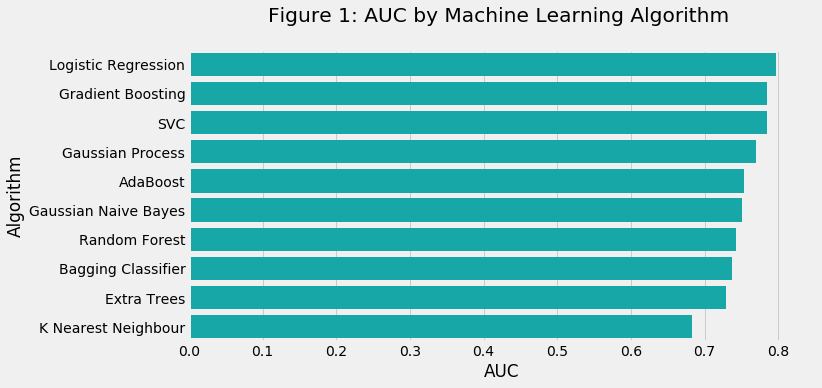

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10, 5))
sns.barplot(x='AUC', y = 'Model', data = result_df, color = 'c')
plt.title('Figure 1: AUC by Machine Learning Algorithm \n')
plt.xlabel('AUC')
plt.ylabel('Algorithm')
plt.xlim(0, 0.85)

Kế tiếp tính toán FI cho các biến của 4 thuật toán thuộc nhóm Ensemble: 

In [55]:
feature_names = list(X)

gbc_imp = pd.DataFrame({'Feature':feature_names, 'gbc importance':gbc.feature_importances_})
ran_imp = pd.DataFrame({'Feature':feature_names, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':feature_names, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':feature_names, 'ada importance':ada.feature_importances_})

# Tổng hợp các kết quả: 
importances = gbc_imp.merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# Tính FI trung bình: 
importances['Average'] = importances.mean(axis=1)

# Xếp hạng: 
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

Có thể hình ảnh hóa FI trung bình cho các biến: 

(0, 0.19)

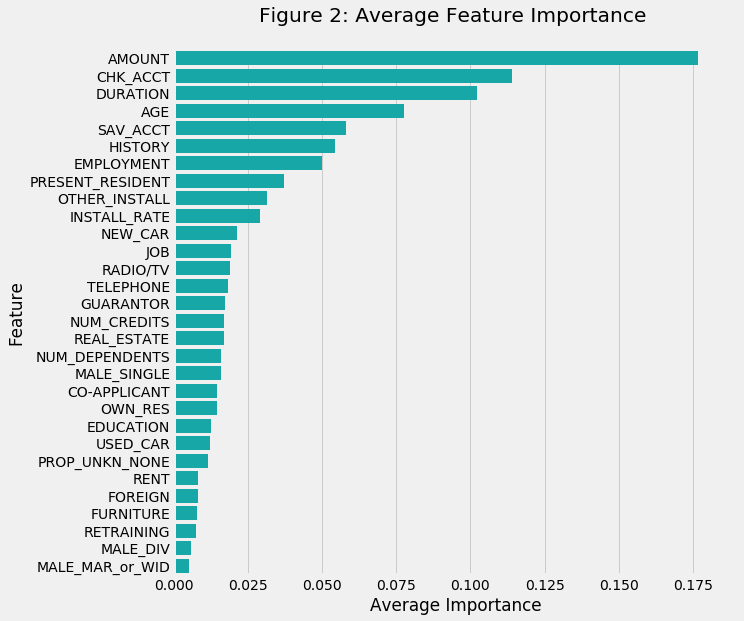

In [46]:
plt.figure(figsize=(9, 9))
sns.barplot(x='Average', y = 'Feature', data = importances, color = 'c')
plt.title('Figure 2: Average Feature Importance \n')
plt.xlabel('Average Importance')
plt.ylabel('Feature')
plt.xlim(0, 0.19)

Loại bỏ các biến có FI trung bình nhỏ hơn 0.01 đồng thời chạy lại các mô hình: 

In [50]:
df_over001 = importances[importances.Average < 0.01]
feature001 = df_over001["Feature"]
feature001 = list(feature001)

my_df_binary = df_bank.drop(["OBS#"], axis=1) 
my_df_binary = my_df_binary.drop(feature001, axis=1)

# Tách ra features và target: 
Y = my_df_binary["RESPONSE"]
X = my_df_binary.drop("RESPONSE", 1)

# Phân chia dữ liệu theo tỉ lệ 80 - 20: 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state = 29, stratify = Y)

# Chuẩn hóa dữ liệu:  
scaler = MinMaxScaler().fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

Chạy các mô hình ML như trên với bộ dữ liệu loại các biến có FI trung bình nhỏ hơn 0.01: 

In [51]:
scores_v2 = []

for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "roc_auc", cv = 5, verbose=0)
    scores_v2.append(acc.mean())

C:\Users\Zbook\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zbook\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zbook\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zbook\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zbook\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

So sánh AUC của các mô hình ML cho hai kịch bản: (1) giữ nguyên số lượng features, và (2) bỏ các features có FI trung bình nhỏ hơn 0.01: 

In [54]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 
              'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 
              'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Original AUC': scores,
    'AUC with FE': scores_v2})

result_df = results.sort_values(by='AUC with FE', ascending=False).reset_index(drop=True)
result_df['Increase'] = result_df['AUC with FE'] - result_df['Original AUC']
result_df

,Model,Original AUC,AUC with FE,Increase
0,Logistic Regression,0.797433,0.800818,0.003385
1,Gradient Boosting,0.784710,0.789955,0.005246
2,SVC,0.784487,0.789695,0.005208
3,Gaussian Process,0.769122,0.784263,0.015141
4,Gaussian Naive Bayes,0.750335,0.764993,0.014658
5,AdaBoost,0.753441,0.760361,0.006920
6,Random Forest,0.742987,0.746689,0.003702
7,Bagging Classifier,0.736886,0.744234,0.007347
8,Extra Trees,0.729204,0.726618,-0.002586
9,K Nearest Neighbour,0.683017,0.700614,0.017597


Như vậy bằng cách bỏ các biến có FI thấp chúng ta có thể tăng ROC/AUC cho 9 trong tổng số 10 mô hình ML với các mức độ gia tăng khác nhau (trừ Extra Trees). 

# 4.6 Tóm tắt chương

Chương này chỉ ra tác động của FE lên chất lượng phân loại - dự báo của các mô hình ML và sử dụng FE như là một "kĩ thuật" nâng cao chất lượng phân loại - dự báo. Để minh họa thì kĩ thuật chuẩn hóa 0-1 được lựa chọn với các mô hình KNN và SVM. Chương này cũng trình bày khía cạnh thực hành của việc kết hợp tinh chỉnh tham số theo cách tiếp cận Grid Search và FE. Chúng ta có thể áp dụng FE hoàn toàn tương tự cho: (1) các mô hình ML khác, (2) các kĩ thuật FE khác, và (3) kết hợp nhiều kĩ thuật FE cho cùng một thuật toán ML. 

Còn nhiều khía cạnh tinh vi hơn của FE áp dụng cho các mô hình ML nhưng trong phạm vi là một textbook cơ bản thì những điều này khó có thể trình bày trong chương. Bạn đọc quan tâm có thể tìm đến các tài liệu khác về chủ đề này. 

# Tài liệu tham khảo

1. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning. New York: Springer.
2. Kuhn, M., & Johnson, K. (2013). Applied predictive modeling. New York: Springer.
3. Müller, A. C., & Guido, S. (2016). Introduction to machine learning with Python: a guide for data scientists. O'Reilly Media, Inc.
4. Géron, A. (2019). Hands-on machine learning with Scikit-Learn and TensorFlow: Concepts, tools, and techniques to build intelligent systems. O'Reilly Media, Inc.
5. Shmueli, G., Bruce, P. C., Yahav, I., Patel, N. R., & Lichtendahl Jr, K. C. (2017). Data mining for business analytics: concepts, techniques, and applications in R. John Wiley & Sons. 